# 机器学习工程师纳米学位（试学班）
## 项目 0: 预测你的下一道世界料理


欢迎来到机器学习的预测烹饪菜系项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

- **实验任务**：给定佐料名称，预测菜品所属的菜系。
- **实验步骤**：菜品数据载入；佐料名称预处理，并预览数据集结构；载入逻辑回归模型，并训练；结果测试并提交，查看实验分数。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---
## 第一步. 下载并导入数据
在这个项目中，你将利用[Yummly](https://www.yummly.com/)所提供的数据集来训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对菜系进行预测。

此项目的数据集来自[Kaggle What's Cooking 竞赛](https://www.kaggle.com/c/whats-cooking/data)。共 39774/9944 个训练和测试数据点，涵盖了中国菜、越南菜、法国菜等的信息。数据集包含以下特征：
- 'id'：24717, 数据编号
- 'cuisine'："indian", 菜系
- 'ingredients'：["tumeric", "vegetable stock", ...] 此菜所包含的佐料

首先你需要前往此 [菜系数据集](https://www.kaggle.com/c/whats-cooking/data) 下载(选择 **Download All** )。如果不能正常下载，请参考教室中的下载教程。然后运行下面区域的代码以载入数据集，以及一些此项目所需的 Python 库。如果成功返回数据集的大小，表示数据集已载入成功。

### 1.1 配置环境
首先按照本目录中`README.md`文件中的第一部分内容，配置实验开发环境和所需库函数。

### 1.2 加载数据 
其次，在下载完实验数据集后，我们将其解压至当前目录中(即：`MLND-cn-trial\`目录下面)， 然后依次输入以下代码，加载本次实验的训练集和测试集。

In [1]:
## 请不要修改下方代码
# 导入依赖库
import json
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 加载数据集
train_filename='train.json'
train_content = pd.read_json(codecs.open(train_filename, mode='r', encoding='utf-8'))

test_filename = 'test.json'
test_content = pd.read_json(codecs.open(test_filename, mode='r', encoding='utf-8'))
    
# 打印加载的数据集数量
print("菜名数据集一共包含 {} 训练数据 和 {} 测试样例。\n".format(len(train_content), len(test_content)))
if len(train_content)==39774 and len(test_content)==9944:
    print("数据成功载入！")
else:
    print("数据载入有问题，请检查文件路径！")

菜名数据集一共包含 39774 训练数据 和 9944 测试样例。

数据成功载入！


### 1.3 数据预览
为了查看我们的数据集的分布和菜品总共的种类，我们打印出部分数据样例。

In [2]:
## 请不要修改下方代码
pd.set_option('display.max_colwidth',120)

### 编程练习
你需要通过`head()`函数来预览训练集`train_content`数据。（输出前5条）

In [3]:
### TODO：打印train_content中前5个数据样例以预览数据
train_content.head(5)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, mil..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, so..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, ch..."


In [4]:
## 请不要修改下方代码
## 查看总共菜品分类
categories=np.unique(train_content['cuisine'])
print("一共包含 {} 种菜品，分别是:\n{}".format(len(categories),categories))

一共包含 20 种菜品，分别是:
[u'brazilian' u'british' u'cajun_creole' u'chinese' u'filipino' u'french'
 u'greek' u'indian' u'irish' u'italian' u'jamaican' u'japanese' u'korean'
 u'mexican' u'moroccan' u'russian' u'southern_us' u'spanish' u'thai'
 u'vietnamese']


---
## 第二步. 分析数据
在项目的第二个部分，你会对菜肴数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测世界菜系的模型，我们需要将数据集分为**特征(Features)**和**目标变量(Target Variables)**。
- **特征**: `'ingredients'`，给我们提供了每个菜品所包含的佐料名称。
- **目标变量**：` 'cuisine'`，是我们希望预测的菜系分类。

他们分别被存在 `train_ingredients` 和 `train_targets` 两个变量名中。

### 编程练习：数据提取
* 将`train_content`中的`ingredients`赋值到`train_integredients`
* 将`train_content`中的`cuisine`赋值到`train_targets`

In [5]:
### TODO：将特征与目标变量分别赋值
train_ingredients = train_content['ingredients']
train_targets = train_content['cuisine']

### TODO: 打印结果，检查是否正确赋值
print(train_ingredients.head(5))
print(train_targets.head(5))

0    [romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese...
1    [plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, mil...
2    [eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, so...
3                                                                                        [water, vegetable oil, wheat, salt]
4    [black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, ch...
Name: ingredients, dtype: object
0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object


### 编程练习：基础统计运算
你的第一个编程练习是计算有关菜系佐料的统计数据。我们已为你导入了 `numpy`，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 使用最频繁的佐料前10分别有哪些？
- 意大利菜中最常见的10个佐料有哪些？

In [23]:
## TODO: 统计佐料出现次数，并赋值到sum_ingredients字典中
import time

start = time.clock()

from collections import defaultdict
sum_ingredients = defaultdict(int)
for row in train_ingredients:
    for item in row:
        sum_ingredients[item] += 1

sum_ingredients = dict(sum_ingredients)
                
end = time.clock()
print end-start
start = time.clock()

sum_ingredients = pd.Series(np.array((",".join([",".join(x) for x in train_ingredients])).split(","))).value_counts().to_dict()
                
end = time.clock()
print end-start

top_10 = dict(sorted(result.items(), key=lambda d:d[1], reverse = True)[0:10]).keys()
print(top_10)


0.28111500931
0.659409136595
[u'olive oil', u'garlic cloves', u'ground black pepper', u'salt', u'sugar', u'water', u'garlic', u'butter', u'onions', u'all-purpose flour']


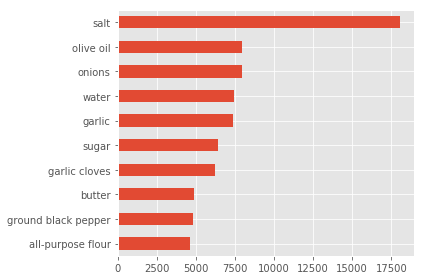

In [15]:
## 请不要修改下方代码
# Finally, plot the 10 most used ingredients
plt.style.use(u'ggplot')
fig = pd.DataFrame(sum_ingredients, index=[0]).transpose()[0].sort_values(ascending=False, inplace=False)[:10].plot(kind='barh')
fig.invert_yaxis()
fig = fig.get_figure()
fig.tight_layout()
fig.show()

In [8]:
## TODO: 统计意大利菜系中佐料出现次数，并赋值到italian_ingredients字典中
italian_ingredients = []
data_set = train_content[train_content["cuisine"]=='italian']['ingredients']
#print(data_set)
result = {}
for x in data_set:
    for y in x:
        if y in result:
            result[y] = result[y] + 1
        else:
             result[y] = 1
top_10 = dict(sorted(result.items(), key=lambda d:d[1], reverse = True)[0:10]).keys()
print(top_10)
italian_ingredients = result

dict_keys(['salt', 'olive oil', 'garlic cloves', 'grated parmesan cheese', 'garlic', 'ground black pepper', 'extra-virgin olive oil', 'onions', 'water', 'butter'])


C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


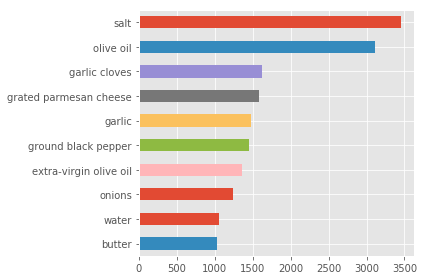

In [9]:
## 请不要修改下方代码
# Finally, plot the 10 most used ingredients
fig = pd.DataFrame(italian_ingredients, index=[0]).transpose()[0].sort_values(ascending=False, inplace=False)[:10].plot(kind='barh')
fig.invert_yaxis()
fig = fig.get_figure()
fig.tight_layout()
fig.show()

若想要对数据分析做更深入的了解，可以参考[数据分析师入门课程](https://cn.udacity.com/dand)或者[基于Python语言的人工智能Nano课程](https://www.udacity.com/legal/ai-programming).

---
## 第三步. 建立模型
在项目的第三步中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 3.1 单词清洗
由于菜品包含的佐料众多，同一种佐料也可能有单复数、时态等变化，为了去除这类差异，我们考虑将**ingredients** 进行过滤

In [10]:
## 请不要修改下方代码
import re
from nltk.stem import WordNetLemmatizer
import numpy as np

def text_clean(ingredients):
    #去除单词的标点符号，只保留 a..z A...Z的单词字符
    ingredients= np.array(ingredients).tolist()
    print("菜品佐料：\n{}".format(ingredients[9]))
    ingredients=[[re.sub('[^A-Za-z]', ' ', word) for word in component]for component in ingredients]
    print("去除标点符号之后的结果：\n{}".format(ingredients[9]))

    # 去除单词的单复数，时态，只保留单词的词干
    lemma=WordNetLemmatizer()
    ingredients=[" ".join([ " ".join([lemma.lemmatize(w) for w in words.split(" ")]) for words in component])  for component in ingredients]
    print("去除时态和单复数之后的结果：\n{}".format(ingredients[9]))
    return ingredients

print("\n处理训练集...")
train_ingredients = text_clean(train_content['ingredients'])
print("\n处理测试集...")
test_ingredients = text_clean(test_content['ingredients'])



处理训练集...
菜品佐料：
['chopped tomatoes', 'fresh basil', 'garlic', 'extra-virgin olive oil', 'kosher salt', 'flat leaf parsley']
去除标点符号之后的结果：
['chopped tomatoes', 'fresh basil', 'garlic', 'extra virgin olive oil', 'kosher salt', 'flat leaf parsley']
去除时态和单复数之后的结果：
chopped tomato fresh basil garlic extra virgin olive oil kosher salt flat leaf parsley

处理测试集...
菜品佐料：
['eggs', 'cherries', 'dates', 'dark muscovado sugar', 'ground cinnamon', 'mixed spice', 'cake', 'vanilla extract', 'self raising flour', 'sultana', 'rum', 'raisins', 'prunes', 'glace cherries', 'butter', 'port']
去除标点符号之后的结果：
['eggs', 'cherries', 'dates', 'dark muscovado sugar', 'ground cinnamon', 'mixed spice', 'cake', 'vanilla extract', 'self raising flour', 'sultana', 'rum', 'raisins', 'prunes', 'glace cherries', 'butter', 'port']
去除时态和单复数之后的结果：
egg cherry date dark muscovado sugar ground cinnamon mixed spice cake vanilla extract self raising flour sultana rum raisin prune glace cherry butter port


### 3.2 特征提取
在该步骤中，我们将菜品的佐料转换成数值特征向量。考虑到绝大多数菜中都包含`salt, water, sugar, butter`等，采用one-hot的方法提取的向量将不能很好的对菜系作出区分。我们将考虑按照佐料出现的次数对佐料做一定的加权，即：佐料出现次数越多，佐料的区分性就越低。我们采用的特征为TF-IDF，相关介绍内容可以参考：[TF-IDF与余弦相似性的应用（一）：自动提取关键词](http://www.ruanyifeng.com/blog/2013/03/tf-idf.html)。

In [11]:
## 请不要修改下方代码
from sklearn.feature_extraction.text import TfidfVectorizer
# 将佐料转换成特征向量

# 处理 训练集
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1),
                analyzer='word', max_df=.57, binary=False,
                token_pattern=r"\w+",sublinear_tf=False)
train_tfidf = vectorizer.fit_transform(train_ingredients).todense()

## 处理 测试集
test_tfidf = vectorizer.transform(test_ingredients)

In [12]:
## 请不要修改下方代码
train_targets=np.array(train_content['cuisine']).tolist()
train_targets[:10]

['greek',
 'southern_us',
 'filipino',
 'indian',
 'indian',
 'jamaican',
 'spanish',
 'italian',
 'mexican',
 'italian']

### 编程练习
这里我们为了防止前面步骤中累积的错误，导致以下步骤无法正常运行。我们在此检查处理完的实验数据是否正确，请打印`train_tfidf`和`train_targets`中前五个数据。

In [13]:
# 你需要通过head()函数来预览训练集train_tfidf,train_targets数据
print(train_tfidf[0:2].tolist())
print(train_targets[0:10])

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2080760884627782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

### 3.3 验证集划分
为了在实验中大致估计模型的精确度我们将从原本的`train_ingredients` 划分出 `20%` 的数据用作`valid_ingredients`。

### 编程练习：数据分割与重排
调用`train_test_split`函数将训练集划分为新的训练集和验证集，便于之后的模型精度观测。
* 从`sklearn.model_selection`中导入`train_test_split`
* 将`train_tfidf`和`train_targets`作为`train_test_split`的输入变量
* 设置`test_size`为0.2，划分出20%的验证集，80%的数据留作新的训练集。
* 设置`random_state`随机种子，以确保每一次运行都可以得到相同划分的结果。（随机种子固定，生成的随机序列就是确定的）

In [14]:
### TODO：划分出验证集

from sklearn.model_selection import train_test_split

X_train , X_valid , y_train, y_valid = train_test_split(train_tfidf,train_targets,test_size=0.2,random_state=0)

### 3.2 建立模型 
调用 `sklearn` 中的逻辑回归模型（Logistic Regression）。

### 编程练习：训练模型
* 从`sklearn.linear_model`导入`LogisticRegression`
* 从`sklearn.model_selection`导入`GridSearchCV`, 参数自动搜索，只要把参数输进去，就能给出最优的结果和参数，这个方法适合小数据集。
* 定义`parameters`变量：为`C`参数创造一个字典，它的值是从1至10的数组;
* 定义`classifier`变量: 使用导入的`LogisticRegression`创建一个分类函数;
* 定义`grid`变量: 使用导入的`GridSearchCV`创建一个网格搜索对象；将变量'classifier', 'parameters'作为参数传至这个对象构造函数中；

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## TODO: 建立逻辑回归模型
parameters = {'C':range(1,11)}  

classifier = LogisticRegression()

grid = GridSearchCV(classifier,parameters)


## 请不要修改下方代码
grid = grid.fit(X_train, y_train)

模型训练结束之后，我们计算模型在验证集`X_valid`上预测结果，并计算模型的预测精度（与`y_valid`逐个比较）。

In [16]:
## 请不要修改下方代码
from sklearn.metrics import accuracy_score ## 计算模型的准确率

valid_predict = grid.predict(X_valid)
valid_score=accuracy_score(y_valid,valid_predict)

print("验证集上的得分为：{}".format(valid_score))

验证集上的得分为：0.7967316153362665


---
## 第四步. 模型预测（可选）

### 4.1 预测测试集

### 编程练习
* 将模型`grid`对测试集`test_tfidf`做预测，然后查看预测结果。

In [17]:
### TODO：预测测试结果
predictions = grid.predict(test_tfidf)

## 请不要修改下方代码
print("预测的测试集个数为：{}".format(len(predictions)))
test_content['cuisine']=predictions
test_content.head(10)

预测的测试集个数为：9944


,id,ingredients,cuisine
0,18009,"[baking powder, eggs, all-purpose flour, raisins, milk, white sugar]",british
1,28583,"[sugar, egg yolks, corn starch, cream of tartar, bananas, vanilla wafers, milk, vanilla extract, toasted pecans, egg...",southern_us
2,41580,"[sausage links, fennel bulb, fronds, olive oil, cuban peppers, onions]",italian
3,29752,"[meat cuts, file powder, smoked sausage, okra, shrimp, andouille sausage, water, paprika, hot sauce, garlic cloves, ...",cajun_creole
4,35687,"[ground black pepper, salt, sausage casings, leeks, parmigiano reggiano cheese, cornmeal, water, extra-virgin olive ...",italian
5,38527,"[baking powder, all-purpose flour, peach slices, corn starch, heavy cream, lemon juice, unsalted butter, salt, white...",southern_us
6,19666,"[grape juice, orange, white zinfandel]",french
7,41217,"[ground ginger, white pepper, green onions, orange juice, sugar, Sriracha, vegetable oil, orange zest, chicken broth...",chinese
8,28753,"[diced onions, taco seasoning mix, all-purpose flour, chopped cilantro fresh, ground cumin, ground cinnamon, vegetab...",mexican
9,22659,"[eggs, cherries, dates, dark muscovado sugar, ground cinnamon, mixed spice, cake, vanilla extract, self raising flou...",british


### 4.2 提交结果
为了更好的测试模型的效果，同时比较与其他人的差距，我们将模型的测试集上的结果提交至 [kaggle What's Cooking?](https://www.kaggle.com/c/whats-cooking/submit) （需要提前注册kaggle账号）。

**注意**：在提交作业时，请将提交排名得分截图，附在压缩包中。


In [18]:
## 加载结果格式
submit_frame = pd.read_csv("sample_submission.csv")
## 保存结果
result = pd.merge(submit_frame, test_content, on="id", how='left')
result = result.rename(index=str, columns={"cuisine_y": "cuisine"})
test_result_name = "tfidf_cuisine_test.csv"
result[['id','cuisine']].to_csv(test_result_name,index=False)

将生成的 **tfidf_cuisine_test.csv** 提交至 <https://www.kaggle.com/c/whats-cooking/submit> 然后选择 **Upload Submission File**, 点击 **Make submission**即可。稍作等待，就可以看到右上角的评分结果（得分大致为：`0.78580` 左右）。